# Logistic Regression - Diabetes

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, auc

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Datasets/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
value_cout=df['Outcome'].value_counts()   # imbalance data  # bais data

In [17]:
result_cnt=df.Outcome

In [22]:
data_rst=list(result_cnt)

<Axes: xlabel='Outcome', ylabel='count'>

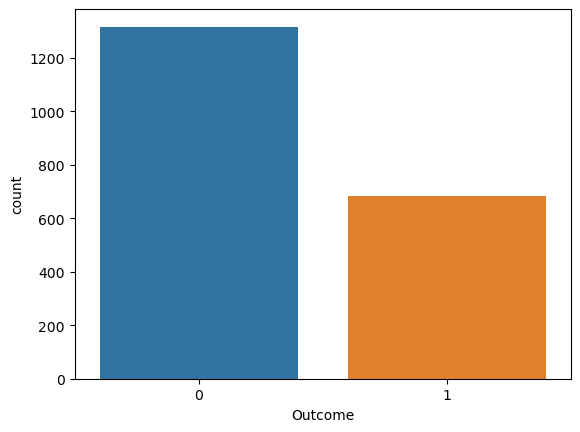

In [16]:
sns.countplot(x  = df['Outcome'])

# Train Test Split

In [ ]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']  # target column

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1, stratify=y)


In [ ]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
# % of 0 class out of total training records 
500/(268+500)

0.6510416666666666

In [ ]:
y_train.value_counts()

Outcome
0    375
1    201
Name: count, dtype: int64

In [ ]:
# without stratify-- if we dont use startify in train_test_split
377/(377+199)

0.6545138888888888

In [ ]:
# with stratify
375/(375+201)

0.6510416666666666

In [ ]:
y_test.value_counts()

Outcome
0    125
1     67
Name: count, dtype: int64

In [ ]:
125/(125+67)

0.6510416666666666

# Model training

In [ ]:
# Create Instance
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

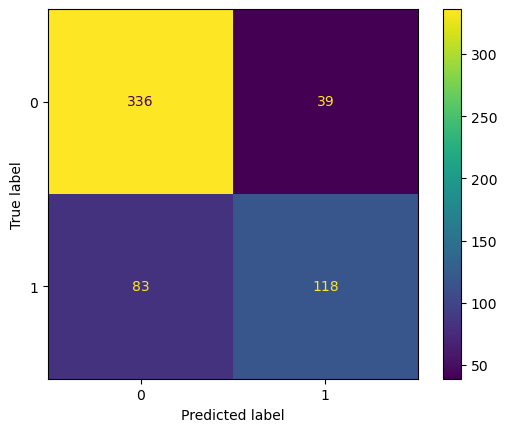

In [ ]:
# Training Data

# Generate predictions
y_pred_train = model.predict(x_train)

# Compute confusion matrix
cm = confusion_matrix(y_train, y_pred_train)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

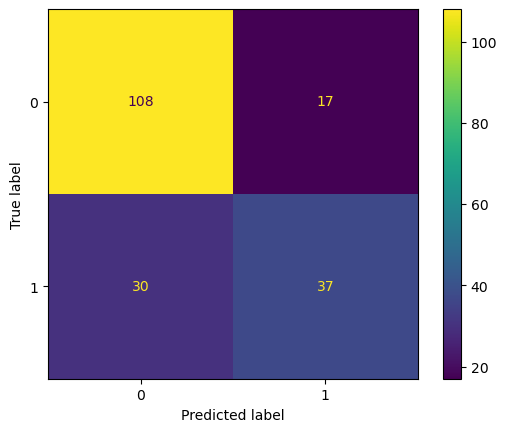

In [ ]:
# Testing Data
# Generate predictions
y_pred_test = model.predict(x_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
# Training Accuracy
model.score(x_train, y_train)

0.7881944444444444

In [ ]:
# Testing Accuracy
model.score(x_test, y_test)

0.7552083333333334

# Model Evaluation

In [ ]:
# prediction
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [ ]:
# prediction probability
y_pred_proba = model.predict_proba(x_test)
y_pred_proba

array([[0.91636593, 0.08363407],
       [0.3242683 , 0.6757317 ],
       [0.7401694 , 0.2598306 ],
       [0.46077825, 0.53922175],
       [0.87524949, 0.12475051],
       [0.97819319, 0.02180681],
       [0.10278616, 0.89721384],
       [0.19029506, 0.80970494],
       [0.0562419 , 0.9437581 ],
       [0.99751217, 0.00248783],
       [0.15771411, 0.84228589],
       [0.54535645, 0.45464355],
       [0.9123823 , 0.0876177 ],
       [0.28324641, 0.71675359],
       [0.57005251, 0.42994749],
       [0.87832339, 0.12167661],
       [0.48524251, 0.51475749],
       [0.93661005, 0.06338995],
       [0.45230045, 0.54769955],
       [0.89635285, 0.10364715],
       [0.93461104, 0.06538896],
       [0.80407841, 0.19592159],
       [0.84464685, 0.15535315],
       [0.81670528, 0.18329472],
       [0.87761443, 0.12238557],
       [0.22827603, 0.77172397],
       [0.36400465, 0.63599535],
       [0.94689595, 0.05310405],
       [0.63964815, 0.36035185],
       [0.61418939, 0.38581061],
       [0.

In [ ]:
# Testing data
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cnf_matrix)

print("*"*45)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[108  17]
 [ 30  37]]
*********************************************
Accuracy Score: 0.7552083333333334
*********************************************
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       125
           1       0.69      0.55      0.61        67

    accuracy                           0.76       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192



In [ ]:
# Training data

# prediction
y_pred_train = model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)

# Visualization

print("*"*45)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[336  39]
 [ 83 118]]
*********************************************
Accuracy Score: 0.7881944444444444
*********************************************
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       375
           1       0.75      0.59      0.66       201

    accuracy                           0.79       576
   macro avg       0.78      0.74      0.75       576
weighted avg       0.78      0.79      0.78       576



In [ ]:
# Weighted Average
#Precision
((0.80 * 375) +(0.75 * 201))/ (375 + 201)

0.7825520833333334

In [ ]:
# Weighted Average
#Recall
((0.90 * 375) +(0.59 * 201)) / (375 +201)

0.7918229166666666

In [ ]:
# macro average
# recall
(0.90 +0.59)/2

0.745

In [ ]:
# macro average
# precision
(0.80 +0.75)/2

0.775

In [ ]:
# Accuracy = TP + TN/(TP+TN+FP+FN)

Accuracy = (118+336)/(118+336+39+83)
Accuracy

0.7881944444444444

In [ ]:
# Precision for class 1  --> We are considering class 1 i.e. Positive class
# Precision = TP/(TP+FP)
Precision_1 = 118/(118+39)
Precision_1

0.7515923566878981

In [ ]:
# Precision for class 0  --> Consider Negative class
# Precision = TN/(TN+FN)
Precision_0 = 336/(336+83)
Precision_0

0.801909307875895

# AUC-ROC Curve

In [ ]:
# prediction probability
y_pred_proba = model.predict_proba(x_train)
y_pred_proba[:,1]  # We are getting class 1 probability

fpr, tpr, thresh = roc_curve(y_train, y_pred_proba[:,1])
thresh

array([       inf, 0.99272316, 0.97542302, 0.96591727, 0.95922065,
       0.91751158, 0.9165327 , 0.90790184, 0.89685792, 0.8140372 ,
       0.80568517, 0.79994312, 0.7973031 , 0.77792856, 0.77732392,
       0.77281851, 0.76976966, 0.76621664, 0.76442532, 0.76340717,
       0.75949424, 0.75691959, 0.75068341, 0.74135842, 0.73192939,
       0.72943604, 0.72936709, 0.7154264 , 0.71070672, 0.69338368,
       0.68829083, 0.68281176, 0.67949085, 0.67213013, 0.66875056,
       0.66568239, 0.66309598, 0.64848877, 0.64828155, 0.63826096,
       0.63456225, 0.6290813 , 0.61663908, 0.61119904, 0.60699552,
       0.59991807, 0.59167685, 0.58769838, 0.5848232 , 0.58040023,
       0.57596775, 0.55408624, 0.55320955, 0.53791236, 0.53666152,
       0.5306205 , 0.5292856 , 0.5134771 , 0.51142691, 0.51017968,
       0.50623077, 0.50347369, 0.49850892, 0.49774348, 0.49325904,
       0.4921982 , 0.48503586, 0.48208929, 0.47931482, 0.47685791,
       0.47638825, 0.46301172, 0.45993164, 0.45272095, 0.44426

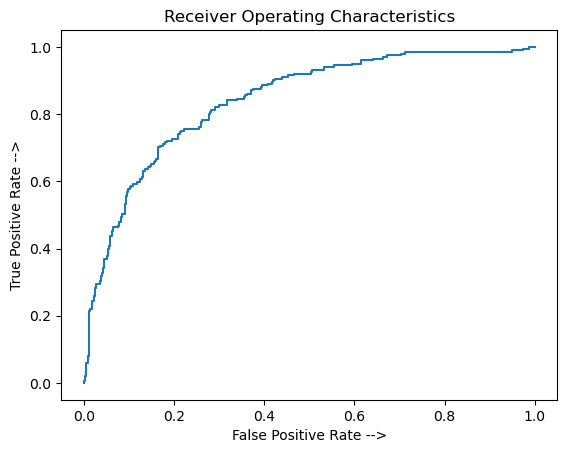

In [ ]:
# Plot AUC-ROC
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate -->")
plt.ylabel("True Positive Rate -->")
title = plt.title("Receiver Operating Characteristics") 

In [ ]:
# [[336  39]
#  [ 83 118]]

TP = 118
TN = 336
FP = 39
FN = 83

fpr = FP/(FP+TN)
fpr = 39/(39+336)
fpr

0.104

In [ ]:
# Calculate AUC

In [ ]:
# 1 way 
auc_value = roc_auc_score(y_train, y_pred_proba[:,1])
auc_value

0.8404112769485904

In [ ]:
# 2nd way
auc_value = auc(fpr, tpr)
auc_value

0.8404112769485904